In [ ]:
#Importing All libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics



In [ ]:
df = pd.read_csv(r'/content/Buy_Computer.csv')
#separate two column
X = df.iloc[:, 1:5].values
Y = df.iloc[:, 5].values

In [ ]:
display(df)

,id,age,income,student,credit_rating,Buy_Computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_age,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_age,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [ ]:
#make data frame
X = pd.DataFrame(X)
y = pd.DataFrame(Y)

In [ ]:
labelencoder = LabelEncoder()
X.values[:, 0] = labelencoder.fit_transform(X.values[:, 0])
X.values[:, 1] = labelencoder.fit_transform(X.values[:, 1])
X.values[:, 2] = labelencoder.fit_transform(X.values[:, 2])
X.values[:, 3] = labelencoder.fit_transform(X.values[:, 3])

In [ ]:
y.values[:, 0] = labelencoder.fit_transform(y.values[:, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 125)

In [ ]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)
X_test=X_test.astype(int)
y_test=y_test.astype(int)

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Confusion Matrix:
[[1 0]
 [2 2]]


In [ ]:
#print accuracy
print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_pred)*100} %")

Accuracy Score: 60.0 %


In [ ]:
#import Graph Library
from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

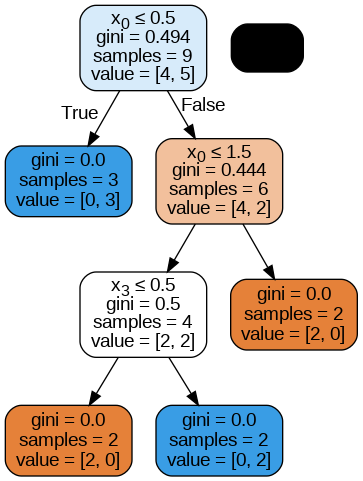

In [ ]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('computer.png')
Image(graph.create_png())

Practical 2 KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv(r'/content/Dataset.csv')

In [ ]:
display(df)

,Day,Outlook,Temp,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,No
1,2,Sunny,Hot,High,True,No
2,3,Overcast,Hot,High,False,Yes
3,4,Rainy,Mild,High,False,Yes
4,5,Rainy,Cool,Normal,False,Yes
5,6,Rainy,Cool,Normal,True,No
6,7,Overcast,Cool,Normal,True,Yes
7,8,Sunny,Mild,High,False,No
8,9,Sunny,Cool,Normal,False,Yes
9,10,Rainy,Mild,Normal,False,Yes


In [ ]:
df.head()

,Day,Outlook,Temp,Humidity,Windy,Play
0,1,Sunny,Hot,High,False,0
1,2,Sunny,Hot,High,True,0
2,3,Overcast,Hot,High,False,1
3,4,Rainy,Mild,High,False,1
4,5,Rainy,Cool,Normal,False,1


In [ ]:
#two separate column
x = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values
#make data frame
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [ ]:
#Data Transformation
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
#lable encode
x.values[:, 0] = labelencoder_X.fit_transform(x.values[:, 0])
x.values[:, 1] = labelencoder_X.fit_transform(x.values[:, 1])
x.values[:, 2] = labelencoder_X.fit_transform(x.values[:, 2])
x.values[:, 3] = labelencoder_X.fit_transform(x.values[:, 3])
y.values[:, 0] = labelencoder_X.fit_transform(y.values[:, 0])

In [ ]:
#model split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train=X_train.astype(float)
y_train=y_train.astype(float)
X_test=X_test.astype(float)
y_test=y_test.astype(float)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Model building
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=19)

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1.]


In [ ]:
#Accuracy and Confusion Matrix
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy : {} %".format(metrics.accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy : 66.66666666666666 %
Confusion Matrix:
[[0 2]
 [0 4]]


Practical 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.rename(columns = {'Interest rate (%) (x)':'Interest Rate', 'Median home price (y)':'Median Home'}, inplace = True)

In [ ]:
df.head()

,Interest Rate,Median Home
0,10.3,"$183,800"
1,10.3,"$183,200"
2,10.1,"$174,900"
3,9.3,"$173,500"
4,8.4,"$172,900"


In [ ]:
#Data Cleaning
df['Median Home'] = df['Median Home'].str.replace('$', '').str.replace(',', '').astype(float)


<ipython-input-21-f05c929363c8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Median Home'] = df['Median Home'].str.replace('$', '').str.replace(',', '').astype(float)


<Axes: xlabel='Interest Rate', ylabel='Median Home'>

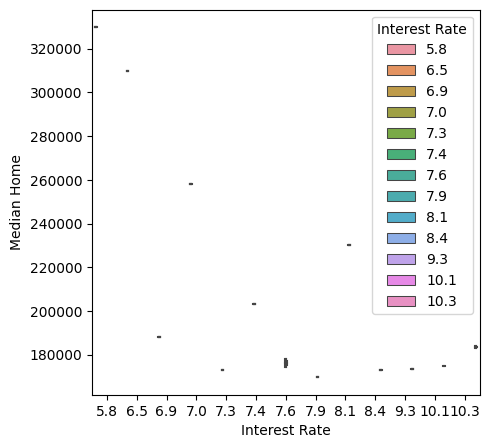

In [ ]:
plt.figure(figsize=(5,5))
sb.boxplot(x=df['Interest Rate'], y=df['Median Home'], hue=df['Interest Rate'])

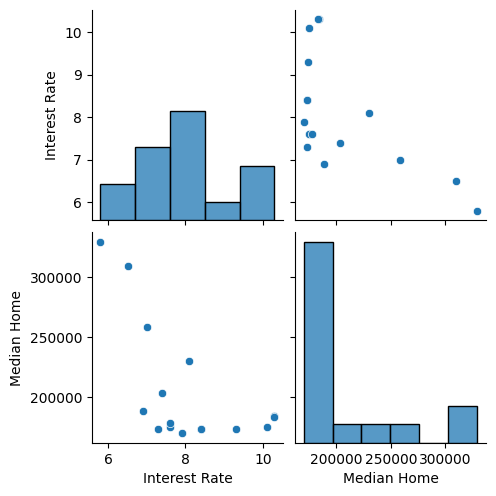

In [ ]:
sb.pairplot(data = df)

<ipython-input-19-4a26927fa283>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Interest Rate'])


<Axes: xlabel='Interest Rate', ylabel='Density'>

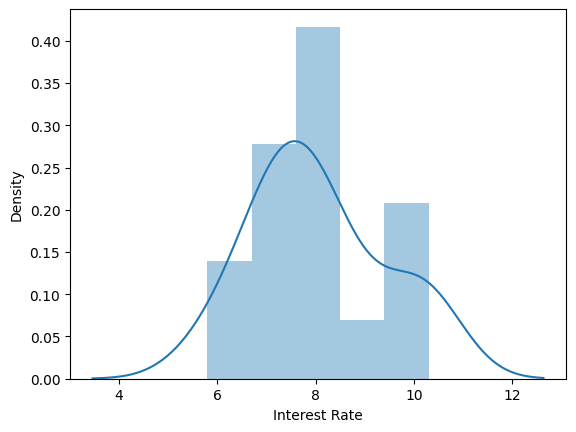

In [ ]:
sb.distplot(df['Interest Rate'])

<ipython-input-24-c52968134736>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Median Home'])


<Axes: xlabel='Median Home', ylabel='Density'>

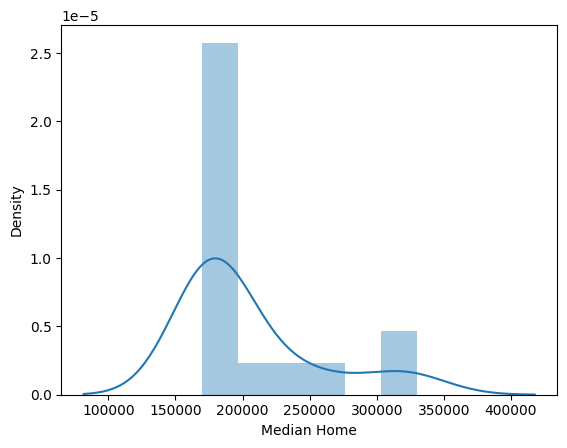

In [ ]:
sb.distplot(df['Median Home'])

In [ ]:
x = df['Interest Rate'].values
y = df['Median Home'].values
x_data = np.array(x)
y_data = np.array(y)
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)
#modal split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=50)

In [ ]:
model=LinearRegression()


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predict = model.predict(X_test)
print(predict)

[[220866.20198576]
 [191595.15595226]
 [211719.00010029]
 [169641.87142714]
 [155006.34841039]]


In [ ]:
p= predict.ravel()

In [ ]:
#Accuracy
from sklearn.metrics import mean_squared_error, median_absolute_error
print(f"Root Mean square error is {np.sqrt(mean_squared_error(y_test,predict))}")
print(f"Mean abs error is {mean_absolute_error(y_test,predict)}")
r_squared = model.score(x_data, y_data)
print(f"Rsquare is {r_squared}")



Root Mean square error is 48929.90965558461
Mean abs error is 39554.284424832025
Rsquare is 0.3037080505044465


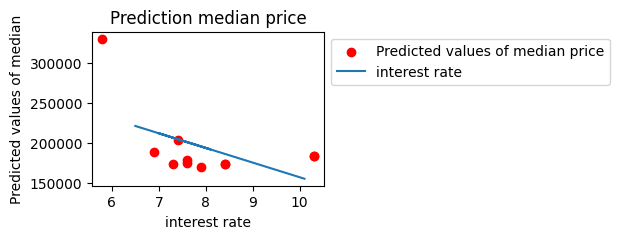

In [ ]:
plt.figure(figsize=(3,2))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,predict)
plt.title("Prediction median price")
plt.xlabel("interest rate")
plt.ylabel("Predicted values of median")

#plt.legend(['Predicted values of Sales'])
plt.legend(["Predicted values of median price", "interest rate"],bbox_to_anchor=(1,1),loc ="upper left")
#plt.legend(bbox_to_anchor=(1,0), loc="upper left")

plt.show()

Practical 3

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/Dataset.csv")
df.head()

,Age,Income,Student,Credit Rating,Buys- Computer
0,Youth,High,No,Fair,No
1,Youth,High,No,Excellent,No
2,Middle,High,No,Fair,Yes
3,Senior,Medium,No,Fair,Yes
4,Senior,Low,Yes,Fair,Yes


In [ ]:
#Data Encoding
le = LabelEncoder()
df_le = df
df_le['Student'] = le.fit_transform(df['Student'])
df_le['Credit Rating'] = le.fit_transform(df['Credit Rating'])
df_le['Buys- Computer'] = le.fit_transform(df['Buys- Computer'])
df_le.head()

,Age,Income,Student,Credit Rating,Buys- Computer
0,Youth,High,0,1,0
1,Youth,High,0,0,0
2,Middle,High,0,1,1
3,Senior,Medium,0,1,1
4,Senior,Low,1,1,1


In [ ]:
#Encoding Age and Income columns with dummy variable
df_age = pd.get_dummies(df_le['Age'])
final_df_age = df_age.drop('Senior', axis='columns')
final_df_age.head()

,Middle,Youth
0,0,1
1,0,1
2,1,0
3,0,0
4,0,0


In [ ]:
df_income = pd.get_dummies(df_le['Income'])
final_df_income = df_income.drop('Low', axis='columns')
final_df_income.head()

,High,Medium
0,1,0
1,1,0
2,1,0
3,0,1
4,0,0


In [ ]:
new_df = pd.concat([df_le,final_df_age,final_df_income], axis='columns')
new_df.head()


,Age,Income,Student,Credit Rating,Buys- Computer,Middle,Youth,High,Medium
0,Youth,High,0,1,0,0,1,1,0
1,Youth,High,0,0,0,0,1,1,0
2,Middle,High,0,1,1,1,0,1,0
3,Senior,Medium,0,1,1,0,0,0,1
4,Senior,Low,1,1,1,0,0,0,0


In [ ]:
final_df = new_df.drop(['Age', 'Income'], axis='columns')
final_df.head()

,Student,Credit Rating,Buys- Computer,Middle,Youth,High,Medium
0,0,1,0,0,1,1,0
1,0,0,0,0,1,1,0
2,0,1,1,1,0,1,0
3,0,1,1,0,0,0,1
4,1,1,1,0,0,0,0


In [ ]:
X = final_df.drop('Buys- Computer', axis='columns')
X.head()


,Student,Credit Rating,Middle,Youth,High,Medium
0,0,1,0,1,1,0
1,0,0,0,1,1,0
2,0,1,1,0,1,0
3,0,1,0,0,0,1
4,1,1,0,0,0,0


In [ ]:
y = final_df['Buys- Computer']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Buys- Computer, dtype: int64

In [ ]:
#Model creation
model= GaussianNB()
model.fit(X, y)

GaussianNB()

In [ ]:
#Test using given condition
prediction = model.predict([[0,1,0,1,0,0]])
print(prediction)
if prediction==0:
  print("Buys-Computer: No")
else:
  print("Buys-Computer: Yes")

[0]
Buys-Computer: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Practical 8

In [ ]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #silhouette score to get the optimal no. of clusters.

In [ ]:
#Importing Dataset
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1 = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df1.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
#Dealing with missing values
print(f"{df1.isnull().sum()}.")
print(f"Total sum {df1.isnull().sum().sum()}")

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64.
Total sum 177


In [ ]:
mean_age = df1['Age'].mean()
int_mean_age = int(mean_age)
int_mean_age

29

In [ ]:
df1['Age'] = df1['Age'].fillna(int_mean_age)
df1.isnull().sum()

<ipython-input-34-90e979f450bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['Age'].fillna(int_mean_age)


Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [ ]:
#Encoding the data
le_sex = LabelEncoder()
df1['sex'] = le_sex.fit_transform(df1['Sex'])
df1.head()

<ipython-input-35-f3c71adae570>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = le_sex.fit_transform(df1['Sex'])


,Pclass,Sex,Age,Fare,Survived,sex
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
df1 = df1.drop(df1[['Sex']], axis='columns')
df1.head()

,Pclass,Age,Fare,Survived,sex
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [ ]:
#Scaling Data
scalar = MinMaxScaler()
scalar.fit(df1[['Pclass']])
df1['Pclass'] = scalar.transform(df1[['Pclass']])
scalar.fit(df1[['Age']])
df1['Age'] = scalar.transform(df1[['Age']])
scalar.fit(df1[['Fare']])
df1['Fare'] = scalar.transform(df1[['Fare']])
scalar.fit(df1[['sex']])
df1['sex'] = scalar.transform(df1[['sex']])
df1.head(10)

,Pclass,Age,Fare,Survived,sex
0,1.0,0.271174,0.014151,0,1.0
1,0.0,0.472229,0.139136,1,0.0
2,1.0,0.321438,0.015469,1,0.0
3,0.0,0.434531,0.103644,1,0.0
4,1.0,0.434531,0.015713,0,1.0
5,1.0,0.359135,0.016510,0,1.0
6,0.0,0.673285,0.101229,0,1.0
7,1.0,0.019854,0.041136,0,1.0
8,1.0,0.334004,0.021731,1,0.0
9,0.5,0.170646,0.058694,1,0.0


In [ ]:
#Model creation
model= KMeans(n_clusters=2)
y_pred= model.fit_predict(df1[['Pclass', 'Age', 'Fare', 'sex']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
model.cluster_centers_

array([[6.94974003e-01, 3.76169648e-01, 4.98193221e-02, 1.00000000e+00],
       [5.79617834e-01, 3.47810079e-01, 8.68188224e-02, 1.11022302e-15]])

In [ ]:
#Visualization
df1['target'] = y_pred
df1.head()

,Pclass,Age,Fare,Survived,sex,target
0,1.0,0.271174,0.014151,0,1.0,0
1,0.0,0.472229,0.139136,1,0.0,1
2,1.0,0.321438,0.015469,1,0.0,1
3,0.0,0.434531,0.103644,1,0.0,1
4,1.0,0.434531,0.015713,0,1.0,0


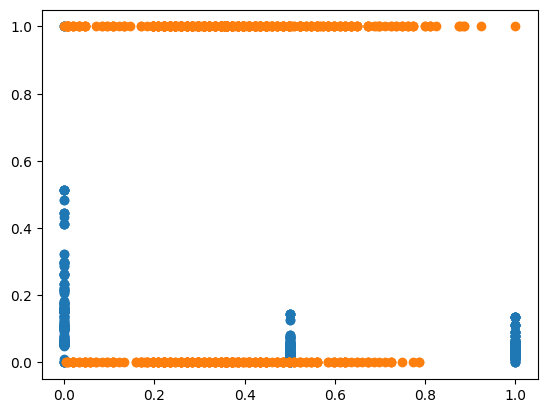

In [ ]:
plt.scatter(df1['Pclass'], df1['Fare'])
plt.scatter(df1['Age'], df1['sex'])

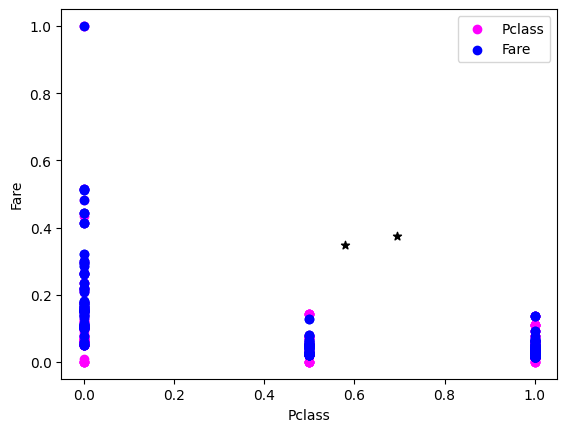

In [ ]:
df_target_0 = df1[df1.target==0]
df_target_1 = df1[df1.target==1]
plt.scatter(df_target_0['Pclass'], df_target_0['Fare'], color='magenta')
plt.scatter(df_target_1['Pclass'], df_target_1['Fare'], color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black',
marker="*")
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.legend(['Pclass', 'Fare'])

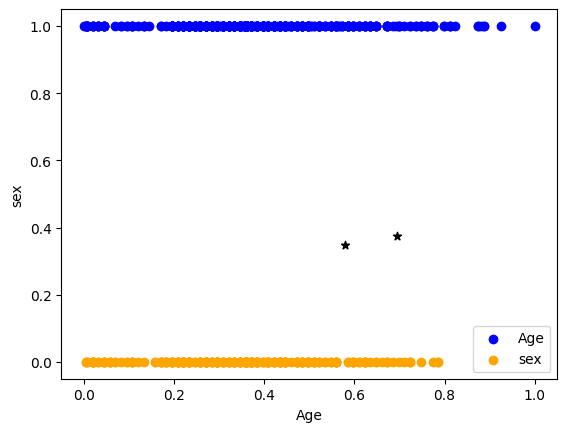

In [ ]:
df_target_0 = df1[df1.target==0]
df_target_1 = df1[df1.target==1]
plt.scatter(df_target_0['Age'], df_target_0['sex'], color='blue')
plt.scatter(df_target_1['Age'], df_target_1['sex'], color='orange')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='black',
marker="*")
plt.xlabel('Age')
plt.ylabel('sex')
plt.legend(['Age', 'sex'])

In [ ]:
score = silhouette_score(df1[['Pclass', 'Age', 'Fare', 'sex']], model.labels_,metric='euclidean')
print(f'Silhouette Score is {score}.')

Silhouette Score is 0.5585600683930331.


Practical 10

In [ ]:
#Import Libraries
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=50)

In [ ]:
max_words = int(input("Select the maximum number of words:"))
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 300
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


Select the maximum number of words:5000


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, return_sequences=True))  # Add an additional LSTM layer with (return_sequences=True reduces dimensionality error)
model.add(LSTM(100))  # Another LSTM layer
model.add(Dense(64, activation='relu'))  # Add a dense layer with ReLU activation
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 128)          640000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 300, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_6 (LSTM)               (None, 300, 100)          91600     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

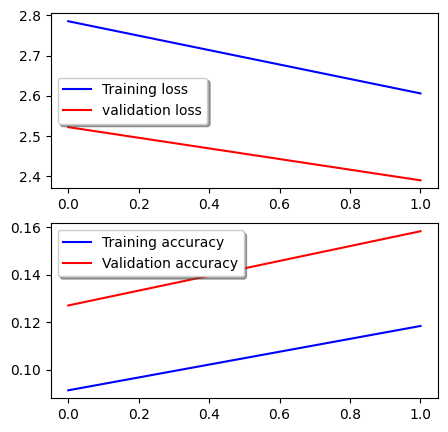

In [ ]:
#Analysis of training & validation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (5,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 2.389983654022217
Test accuracy: 0.1583554446697235


In [ ]:
#Predictions
new_text = input("Write anything:")
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=max_sequence_length)

# Make predictions and convert to class labels
predictions = model.predict(new_text_padded)
predicted_labels = np.argmax(predictions, axis=1)

# Map class labels back to category names
category_names = newsgroups.target_names
predicted_categories = [category_names[label] for label in predicted_labels]

print(f"Predicted category: {predicted_categories[0]}")

Write anything:How to maintain your vehicle for longevity.
2/2 [==============================] - 0s 79ms/step
Predicted category: rec.autos


Practical 6

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
# Load the Iris dataset and Split it
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
#model creation
model = KNeighborsClassifier(n_neighbors=3) #Total classes are 3

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with k=3: {accuracy * 100:.2f}%")

Accuracy of KNN classifier with k=3: 93.33%


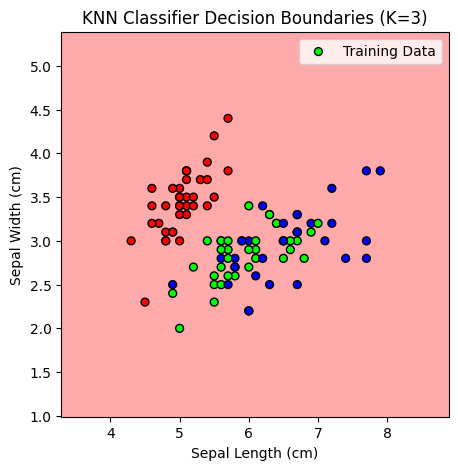

In [ ]:
# Create a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Mesh grid for all four features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class labels for the mesh grid
mesh_data = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]
Z = model.predict(mesh_data)

# Reshape the prediction results to match the mesh grid shape
Z = Z.reshape(xx.shape)

# Plot the training points
plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=32, label='Training Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Classifier Decision Boundaries (K=3)')
plt.legend()
plt.show()

In [ ]:
# Define your own data point for prediction
new_data_point = np.array([[5, 2, 1, 0.5]])

# Make a prediction using the KNN classifier
predicted_class = model.predict(new_data_point)

# Map the predicted class label to its corresponding species name
species_names = ['setosa', 'versicolor', 'virginica']
predicted_species = species_names[predicted_class[0]]

print(f"The predicted species for your data point is: {predicted_species}")

The predicted species for your data point is: setosa


Practical 7

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load the breast cancer dataset and Split it
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data  # Features
y = breast_cancer.target  # Target labels (0 for malignant, 1 for benign)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [ ]:
# Model Creation
svm = SVC(kernel='linear')

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy * 100} %")

Accuracy of SVM classifier: 95.32163742690058 %


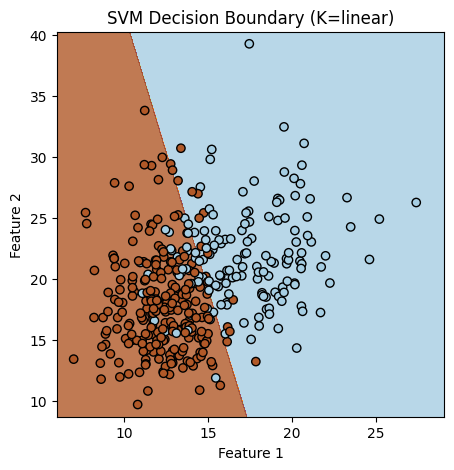

In [ ]:
# Select two features (e.g., the first two features) for visualization
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Extract the selected features for visualization
X_visualize = X[:, [feature1_index, feature2_index]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_visualize, y, test_size=0.3, random_state=30)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Plot the decision boundary
plt.figure(figsize=(5, 5))

# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_visualize[:, 0].min() - 1, X_visualize[:, 0].max() + 1
y_min, y_max = X_visualize[:, 1].min() - 1, X_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel(f'Feature {feature1_index + 1}') # feature 1 is radius
plt.ylabel(f'Feature {feature2_index + 1}') # feature 2 is texture
plt.title('SVM Decision Boundary (K=linear)')

plt.show()


In [ ]:
#Other predictions
new_data_point = [8,8]  # Example feature values

# Make a prediction using the SVM classifier
predicted_class = svm_classifier.predict([new_data_point])

# Map the predicted class label to its corresponding category (malignant or benign)
class_names = ['Malignant', 'Benign']
predicted_category = class_names[predicted_class[0]]

print(f"The predicted category for your data point is: {predicted_category}")

The predicted category for your data point is: Benign


In [ ]:
#Other predictions
new_data_point = [22,22]  # Example feature values

# Make a prediction using the SVM classifier
predicted_class = svm_classifier.predict([new_data_point])

# Map the predicted class label to its corresponding category (malignant or benign)
class_names = ['Malignant', 'Benign']
predicted_category = class_names[predicted_class[0]]

print(f"The predicted category for your data point is: {predicted_category}")

The predicted category for your data point is: Malignant


Practical 5

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
#Load Dataset
df = pd.read_csv(r'/content/Dataset5.csv')
print(f"size of dataset is {df.shape}.")
df.head()

size of dataset is (47, 3).


,Square Feet,Number of Bed Rooms,Price of House
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
#Check null values
print(df.isnull().sum())
df.isnull().sum().sum()

Square Feet            0
Number of Bed Rooms    0
Price of House         0
dtype: int64


0

In [ ]:
print(f"Unique values of no. of bedrooms {df['Number of Bed Rooms'].unique()}.....")
print(f"Unique values of Square Feet {df['Square Feet'].unique()}.....")
print(f"Unique values of Price of House {df['Price of House'].unique()}.....")

Unique values of no. of bedrooms [3 2 4 5 1].....
Unique values of Square Feet [2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
 1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
 2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
 2567 1200  852 1852 1203].....
Unique values of Price of House [399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 199900 499998 599000 252900
 255000 242900 573900 249900 464500 469000 475000 349900 169900 579900
 285900 229900 345000 549000 287000 368500 314000 299000 179900 239500].....


In [ ]:
#Model creation
model= LinearRegression()
model.fit(df[['Square Feet', 'Number of Bed Rooms']], df['Price of House'])

LinearRegression()

In [ ]:
print(f"The coefficient is {model.coef_} & intercept is {model.intercept_}.")

The coefficient is [  139.21067402 -8738.01911233] & intercept is 89597.90954279754.


In [ ]:
#Prediction on custom data
p=[]
sq=int(input("Enter number of square feet:"))
nb=int(input("Enter number of bedrooms:"))
p.append(sq)
p.append(nb)
print(f"The predicted price is {model.predict([p])}.")

Enter number of square feet:2000
Enter number of bedrooms:3
The predicted price is [341805.20024107].


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Practical 9

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=60c8d4d0d19e845933f3b3f6dd0ec66e156ed4cd34e96a0066397769c3b3de4a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [ ]:
#Load Dataset
df = pd.read_csv(r'/content/Dataset9.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df)

7501

In [ ]:
records = []
for i in range(0, 7501):
  records.append([str(df.values[i,j]) for j in range(0,20)])
for i in records[0:2]:
  print(i)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
print(len(association_results))

48


In [ ]:
#Find relationship
print(association_results[8])

RelationRecord(items=frozenset({'frozen vegetables', 'shrimp', 'chocolate'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables', 'chocolate'}), items_add=frozenset({'shrimp'}), confidence=0.23255813953488375, lift=3.2545123221103784), OrderedStatistic(items_base=frozenset({'shrimp', 'chocolate'}), items_add=frozenset({'frozen vegetables'}), confidence=0.29629629629629634, lift=3.1084175084175087)])


In [ ]:
#Extracting Association
for item in association_results:
  #first index of the inner list
  #contains base item and add item
  pair = item[0]
  items = [x for x in pair]
  print("Rule: " + items[0] + " -> " + items[1])
  #second index of the inner list
  print("Support: " + str(item[1]))
  #third index of the list located at 0th
  #of the third index of the inner list
  print("Confidence: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("-----------------------------------------")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
-----------------------------------------
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
-----------------------------------------
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
-----------------------------------------
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
-----------------------------------------
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
-----------------------------------------
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
-----------------------------------------
Rule: pasta -> shrimp
Support: 0.005065